# Pre procesamiento de datos

In [2]:
# Importar librerias
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('tabla_principal.csv', skiprows=8)
df.head()

,Unnamed: 0,Ley,Modificado,Ejecutado *,Ejecución (%),Ley.1,Modificado.1,Ejecutado *.1,Ejecución (%).1
0,Sector Público,"14,672.9","14,653.7","8,904.6",60.8%,"8,996.4","9,039.4","4,496.2",49.7%
1,Sector Público No Financiero,"13,701.0","13,681.8","8,460.3",61.8%,"5,635.8","5,675.7","2,566.6",45.2%
2,Gobierno Central,"7,884.8","7,850.0","5,245.2",66.8%,"3,227.6","3,273.9","1,966.1",60.1%
3,Ambiente,33.6,33.5,19.4,57.8%,36.0,36.1,13.3,36.9%
4,Asamblea Nacional,104.1,107.6,54.7,50.8%,19.1,19.1,6.4,33.5%


In [72]:
# Analisis de datos
print("Esta base de datos tiene: ",df.shape)

Esta base de datos tiene:  (121, 9)


In [73]:
df.describe()

,Unnamed: 0,Ley,Modificado,Ejecutado *,Ejecución (%),Ley.1,Modificado.1,Ejecutado *.1,Ejecución (%).1
count,102,97,97,97,98,97,97,97,97
unique,102,91,91,83,82,77,80,72,86
top,UMIP,3.7,6.6,4.0,0.0%,-,-,-,-
freq,1,2,3,4,3,10,10,10,10


In [74]:
# Nombre de las columnas
df.columns

Index(['Unnamed: 0', 'Ley', 'Modificado', 'Ejecutado *', 'Ejecución (%)',
       'Ley.1', 'Modificado.1', 'Ejecutado *.1', 'Ejecución (%).1'],
      dtype='object')

In [75]:
# Agarrar las primeras 94 filas
df_pro = df.iloc[0:94]
df_pro

,Unnamed: 0,Ley,Modificado,Ejecutado *,Ejecución (%),Ley.1,Modificado.1,Ejecutado *.1,Ejecución (%).1
0,Sector Público,"14,672.9","14,653.7","8,904.6",60.8%,"8,996.4","9,039.4","4,496.2",49.7%
1,Sector Público No Financiero,"13,701.0","13,681.8","8,460.3",61.8%,"5,635.8","5,675.7","2,566.6",45.2%
2,Gobierno Central,"7,884.8","7,850.0","5,245.2",66.8%,"3,227.6","3,273.9","1,966.1",60.1%
3,Ambiente,33.6,33.5,19.4,57.8%,36.0,36.1,13.3,36.9%
4,Asamblea Nacional,104.1,107.6,54.7,50.8%,19.1,19.1,6.4,33.5%
5,Comercio e Industrias,35.8,36.7,18.7,51.0%,2.2,2.3,1.8,78.0%
6,Contraloría General de la República,104.3,103.0,59.6,57.9%,4.0,5.3,3.3,62.5%
7,Defensoría del Pueblo,5.4,5.5,3.3,61.3%,0.4,0.4,0.2,36.9%
8,Desarrollo Agropecuario,64.3,64.2,37.7,58.7%,95.6,129.2,105.3,81.5%
9,Desarrollo Social,30.1,29.7,17.7,59.6%,255.6,256.2,197.8,77.2%


In [76]:
df_pro = df_pro.rename(columns={'Unnamed: 0': 'Detalle','Ejecutado *':'Ejecutado',
                               'Ejecutado *.1':'Ejecutado.1'})
df_pro

,Detalle,Ley,Modificado,Ejecutado,Ejecución (%),Ley.1,Modificado.1,Ejecutado.1,Ejecución (%).1
0,Sector Público,"14,672.9","14,653.7","8,904.6",60.8%,"8,996.4","9,039.4","4,496.2",49.7%
1,Sector Público No Financiero,"13,701.0","13,681.8","8,460.3",61.8%,"5,635.8","5,675.7","2,566.6",45.2%
2,Gobierno Central,"7,884.8","7,850.0","5,245.2",66.8%,"3,227.6","3,273.9","1,966.1",60.1%
3,Ambiente,33.6,33.5,19.4,57.8%,36.0,36.1,13.3,36.9%
4,Asamblea Nacional,104.1,107.6,54.7,50.8%,19.1,19.1,6.4,33.5%
5,Comercio e Industrias,35.8,36.7,18.7,51.0%,2.2,2.3,1.8,78.0%
6,Contraloría General de la República,104.3,103.0,59.6,57.9%,4.0,5.3,3.3,62.5%
7,Defensoría del Pueblo,5.4,5.5,3.3,61.3%,0.4,0.4,0.2,36.9%
8,Desarrollo Agropecuario,64.3,64.2,37.7,58.7%,95.6,129.2,105.3,81.5%
9,Desarrollo Social,30.1,29.7,17.7,59.6%,255.6,256.2,197.8,77.2%


In [77]:
#Salvado el dataframe
df_pro.to_excel('tabla_procesado.xlsx')

In [78]:
df_pro.head(60)

,Detalle,Ley,Modificado,Ejecutado,Ejecución (%),Ley.1,Modificado.1,Ejecutado.1,Ejecución (%).1
0,Sector Público,"14,672.9","14,653.7","8,904.6",60.8%,"8,996.4","9,039.4","4,496.2",49.7%
1,Sector Público No Financiero,"13,701.0","13,681.8","8,460.3",61.8%,"5,635.8","5,675.7","2,566.6",45.2%
2,Gobierno Central,"7,884.8","7,850.0","5,245.2",66.8%,"3,227.6","3,273.9","1,966.1",60.1%
3,Ambiente,33.6,33.5,19.4,57.8%,36.0,36.1,13.3,36.9%
4,Asamblea Nacional,104.1,107.6,54.7,50.8%,19.1,19.1,6.4,33.5%
5,Comercio e Industrias,35.8,36.7,18.7,51.0%,2.2,2.3,1.8,78.0%
6,Contraloría General de la República,104.3,103.0,59.6,57.9%,4.0,5.3,3.3,62.5%
7,Defensoría del Pueblo,5.4,5.5,3.3,61.3%,0.4,0.4,0.2,36.9%
8,Desarrollo Agropecuario,64.3,64.2,37.7,58.7%,95.6,129.2,105.3,81.5%
9,Desarrollo Social,30.1,29.7,17.7,59.6%,255.6,256.2,197.8,77.2%


In [79]:
# Eliminar columnas que no me sirven

df_pro_processed = df_pro
del df_pro_processed['Ley']
del df_pro_processed['Ley.1']
del df_pro_processed['Modificado.1']
del df_pro_processed['Ejecutado.1']
del df_pro_processed['Ejecución (%).1']
df_pro_processed

,Detalle,Modificado,Ejecutado,Ejecución (%)
0,Sector Público,"14,653.7","8,904.6",60.8%
1,Sector Público No Financiero,"13,681.8","8,460.3",61.8%
2,Gobierno Central,"7,850.0","5,245.2",66.8%
3,Ambiente,33.5,19.4,57.8%
4,Asamblea Nacional,107.6,54.7,50.8%
5,Comercio e Industrias,36.7,18.7,51.0%
6,Contraloría General de la República,103.0,59.6,57.9%
7,Defensoría del Pueblo,5.5,3.3,61.3%
8,Desarrollo Agropecuario,64.2,37.7,58.7%
9,Desarrollo Social,29.7,17.7,59.6%


## Ejecuta esta celda siempre (la de abajo)

In [136]:
#
# Lista del top 10
top_10 = {'UTP','UP','UDELAS','SENACYT','INADEH','IDAAN','ANTAI','AMPYME','UMIP','CA'}

df_top_10 = df_pro_processed[df_pro_processed['Detalle'].isin(top_10)] 

df_top_10 = df_top_10.rename(columns={'Modificado': 'Total','Ejecución (%)':'Porcentaje_ejecutado'})
              
df_top_10

,Detalle,Total,Ejecutado,Porcentaje_ejecutado
37,AMPYME,6.6,3.6,54.3%
39,ANTAI,2.5,1.0,40.4%
56,IDAAN,170.2,80.6,47.4%
61,INADEH,18.5,9.7,52.5%
73,SENACYT,7.3,4.3,59.5%
83,UDELAS,25.4,14.1,55.6%
84,UMIP,9.5,4.0,42.2%
86,UP,265.0,151.1,57.0%
87,UTP,100.1,52.8,52.7%
93,CA,206.8,161.5,78.1%


In [146]:
df_top_10.dtypes

Total                   object
Ejecutado               object
Porcentaje_ejecutado    object
dtype: object

# Empieza la visualización

In [85]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [139]:
# Detalle como indice
df_top_10 = df_top_10.set_index('Detalle')

In [140]:
df_top_10

,Total,Ejecutado,Porcentaje_ejecutado
Detalle,,,
AMPYME,6.6,3.6,54.3%
ANTAI,2.5,1.0,40.4%
IDAAN,170.2,80.6,47.4%
INADEH,18.5,9.7,52.5%
SENACYT,7.3,4.3,59.5%
UDELAS,25.4,14.1,55.6%
UMIP,9.5,4.0,42.2%
UP,265.0,151.1,57.0%
UTP,100.1,52.8,52.7%


## Preprocesamiento para visualizacion de Detalle-Total

In [148]:
df_top_10['Porcentaje_ejecutado'] = df_top_10.Porcentaje_ejecutado.str.replace('%', '').astype(float)

In [154]:
df_top_10['Total'] = df_top_10.Total.astype(float)
df_top_10['Ejecutado'] = df_top_10.Ejecutado.astype(float)

In [155]:
df_top_10.dtypes

Total                   float64
Ejecutado               float64
Porcentaje_ejecutado    float64
dtype: object

In [162]:
# Preprocesamiento para visualizacion de Detalle-Total
df_det_tot = df_top_10['Total']
df_det_tot

Detalle
AMPYME       6.6
ANTAI        2.5
IDAAN      170.2
INADEH      18.5
SENACYT      7.3
UDELAS      25.4
UMIP         9.5
UP         265.0
UTP        100.1
CA         206.8
Name: Total, dtype: float64

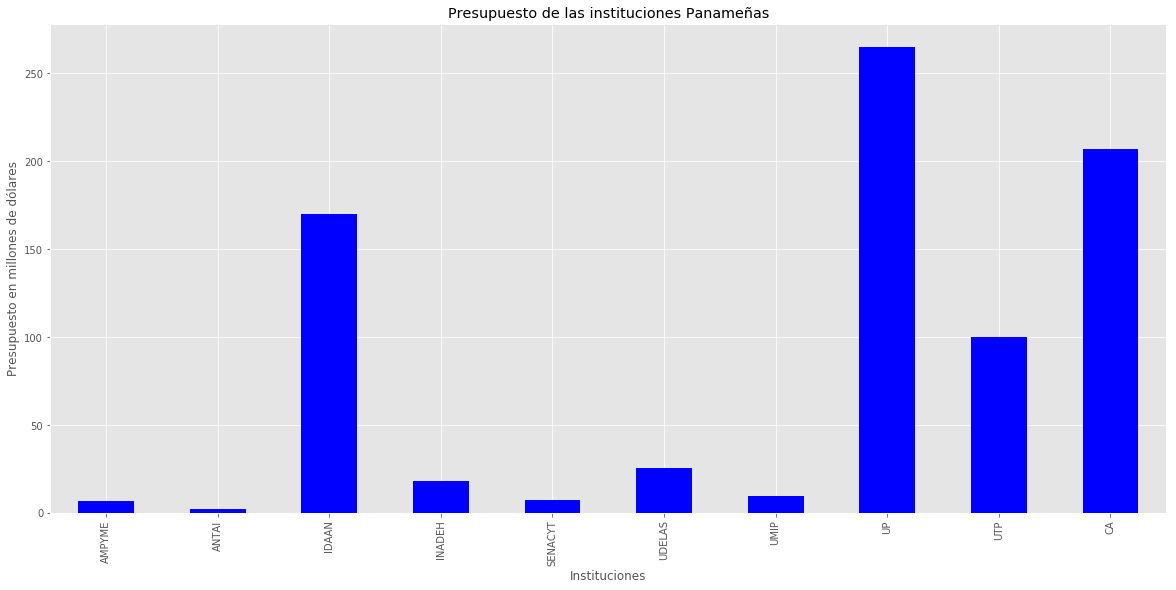

In [179]:
# Visualizacion de datos Institucion-Total

df_det_tot.plot(kind='bar', figsize=(20, 9), color='blue')
plt.xlabel('Instituciones') # add to x-label to the plot
plt.ylabel('Presupuesto en millones de dólares') # add y-label to the plot
plt.title('Presupuesto de las instituciones Panameñas') # add title to the plot

plt.show()

## Preprocesamiento para visualizacion de Detalle-Ejecutado

In [166]:
df_top_10

,Total,Ejecutado,Porcentaje_ejecutado
Detalle,,,
AMPYME,6.6,3.6,54.3
ANTAI,2.5,1.0,40.4
IDAAN,170.2,80.6,47.4
INADEH,18.5,9.7,52.5
SENACYT,7.3,4.3,59.5
UDELAS,25.4,14.1,55.6
UMIP,9.5,4.0,42.2
UP,265.0,151.1,57.0
UTP,100.1,52.8,52.7


In [168]:
# Preprocesamiento para visualizacion de Detalle-Total
df_det_per = df_top_10['Porcentaje_ejecutado']
df_det_per

Detalle
AMPYME     54.3
ANTAI      40.4
IDAAN      47.4
INADEH     52.5
SENACYT    59.5
UDELAS     55.6
UMIP       42.2
UP         57.0
UTP        52.7
CA         78.1
Name: Porcentaje_ejecutado, dtype: float64

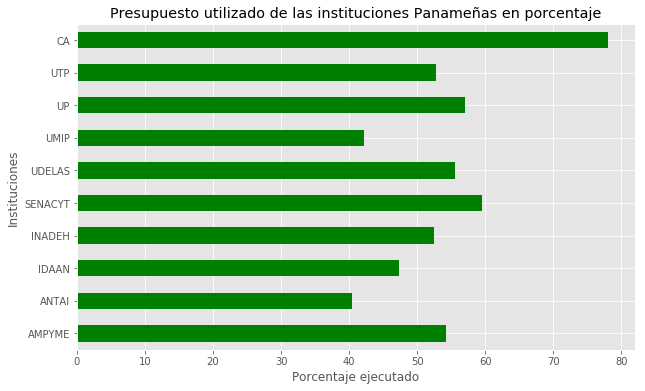

In [172]:
# Visualizacion de datos Institucion-Total

df_det_per.plot(kind='barh', figsize=(10, 6), color='green')
plt.ylabel('Instituciones') # add to x-label to the plot
plt.xlabel('Porcentaje ejecutado') # add y-label to the plot
plt.title('Presupuesto utilizado de las instituciones Panameñas en porcentaje') # add title to the plot

plt.show()